# Statistiques en grande dimension

## Projet 4 : Régression en grande dimension et sparsité

Hajji Mohammed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.linear_model import ElasticNet, lasso_path
from sklearn.metrics import mean_squared_error
import pandas as pd
from scipy.stats import skew

   ### Exercice 1

Supposons que l'on obsèrve le modèle linéaire: $$ Y=X\beta+\eta,$$ avec $\eta$ un vecteur gaussien standard de dimension $n=100$

On pose, $n=1000, p=5000, 
\beta_{1}=...=\beta_{15}=1,$ et les autres coordonnées sont nulles. 

On suppose aussi que les colonnes $X_{.,j}$ de $X$ sont i.i.d.  gaussiens standards (pas corrélées)

In [2]:
p=5000
n=1000
eta=np.random.randn(n)
X=np.random.randn(n, p)
beta=np.zeros(p)
beta[:15]=1
y=np.dot(X,beta)+eta
    

On sépare ensuite notre échantillon en deux: deux tiers de données pour l'estimation du modèle et un tiers des données pour tester le modèle retenu:

In [3]:
X_train, y_train = X[:(2*(n-10))//3], y[:(2*(n-10))//3]
X_test, y_test = X[(2*(n-10))//3:], y[(2*(n-10))// 3:]

In [4]:
np.shape( y_train)

(660,)

                                        Question 1

1.a) Estimation du vecteur de regression par la méthode Elastic-Net pour toutes les valeur de $\alpha$ dans {0,0.1,0.2,...,0.9,1}

In [5]:
k=np.arange(10)/10
for i in k:
    regr = ElasticNet(l1_ratio=i)
    regr.fit(X, y)
    print("pour lambda =",i,"betachapeau =",regr.coef_)

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1376.6420397281731, tolerance: 1.6546553186047968
  positive)


pour lambda = 0.0 betachapeau = [ 0.19104986  0.19077531  0.16044319 ... -0.02971189  0.0280931
  0.00853212]
pour lambda = 0.1 betachapeau = [ 0.4769009   0.4256948   0.3837326  ... -0.00908557  0.
  0.        ]
pour lambda = 0.2 betachapeau = [ 0.52999363  0.46751025  0.42061837 ... -0.          0.
  0.        ]
pour lambda = 0.3 betachapeau = [ 0.51470555  0.44615554  0.39153726 ... -0.          0.
  0.        ]
pour lambda = 0.4 betachapeau = [ 0.48978307  0.41517326  0.35241568 ... -0.          0.
  0.        ]
pour lambda = 0.5 betachapeau = [ 0.46182478  0.38003894  0.30771035 ... -0.          0.
  0.        ]
pour lambda = 0.6 betachapeau = [ 0.43083324  0.34045658  0.25635281 ... -0.          0.
  0.        ]
pour lambda = 0.7 betachapeau = [ 0.3963596   0.2955384   0.19673153 ... -0.          0.
  0.        ]
pour lambda = 0.8 betachapeau = [ 0.35790248  0.24415027  0.12666522 ... -0.          0.
  0.        ]
pour lambda = 0.9 betachapeau = [ 0.31424399  0.18507863  0.043624

1.b) Chemin de régularisation de Lasso

Le chemin de régularisation de la régression Lasso est l’ensemble des
fonctions: $$\lambda \longmapsto (\hat{\beta}^{lasso})_j$$ pour $j=1,...5000$

In [6]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)

Text(0.5, 1.0, 'Chemin de Régularisation de Lasso')

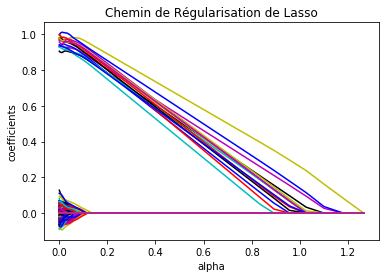

In [7]:
colors = cycle(['y','m', 'b', 'c', 'r', 'k'])
for coef_l, c in zip(coefs_lasso, colors):
    shm = plt.plot(alphas_lasso, coef_l, c=c)
plt.xlabel('alpha')
plt.ylabel('coefficients')
#plt.legend(shm)
plt.title('Chemin de Régularisation de Lasso')
#plt.axis('tight')

1.c) Les valeurs optimales du paramètre de régularistion pour les 3 méthodes:

La valeur optimale du paramètre de régulariastion $\lambda$ pour l'estimateur de Lasso:

In [8]:
intrv_lambda=np.arange(11)/10
stock_err_lasso1=[]
for i in intrv_lambda:
    regrs = ElasticNet(l1_ratio=1,alpha=i)
    y_pred_lasso1 = regrs.fit(X_train, y_train).predict(X_test)
    err_squared_lasso1=mean_squared_error(y_test,y_pred_lasso1)
    stock_err_lasso1.append(err_squared_lasso1)
    
        

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


In [9]:
stock_err_lasso1

[2.603834246359327,
 1.248591028641097,
 1.707982685478091,
 2.5486420325747186,
 3.7288378512559834,
 5.248570141521885,
 7.107838903372422,
 9.306644136807595,
 11.777717956794344,
 14.000079549996602,
 15.552048008397309]

Text(0, 0.5, 'MSE')

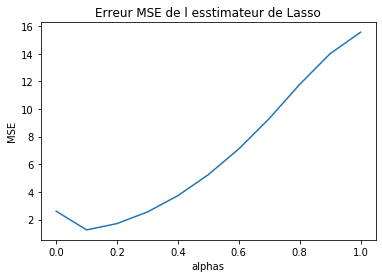

In [10]:
plt.plot(intrv_lambda,stock_err_lasso1)
plt.title('Erreur MSE de l esstimateur de Lasso')
plt.xlabel('alphas')
plt.ylabel('MSE')

In [11]:
intrv_lambda[np.argmin(stock_err_lasso1)]

0.1

la valeur optimal du $\lambda^{lasso}$ est $0.1$

# 

La valeur optimale du paramètre de régulariastion $\mu^{lasso}$ pour l'estimateur de Ridge:

In [12]:
stock_err_ridge1=[]
for i in intrv_lambda:
    regrs = ElasticNet(l1_ratio=0,alpha=i,max_iter=1000)
    y_pred_ridge1 = regrs.fit(X_train, y_train).predict(X_test)
    err_squared_ridge1=mean_squared_error(y_test,y_pred_ridge1)
    stock_err_ridge1.append(err_squared_ridge1)

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.13339195358917, tolerance: 1.0843289952573616
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.24440311

In [13]:
stock_err_ridge1

[2.603834246359327,
 15.366196376641255,
 15.35912166203737,
 15.353103772084316,
 15.34804574891238,
 15.343862141635434,
 15.340476116516971,
 15.337818430256721,
 15.33582654623893,
 15.334443870894052,
 15.333619091446385]

On trace l'erreur MSE de Ridge 

Text(0, 0.5, 'MSE')

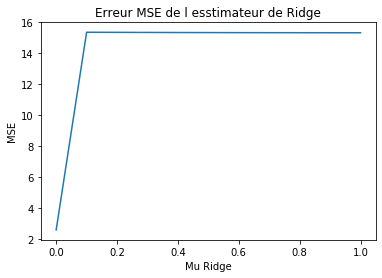

In [14]:
plt.plot(intrv_lambda,stock_err_ridge1)
plt.title('Erreur MSE de l esstimateur de Ridge')
plt.xlabel('Mu Ridge')
plt.ylabel('MSE')

In [15]:
intrv_lambda[np.argmin(stock_err_ridge1)]

0.0

La valeur optimale du paramètre de régulariastion $\mu^{lasso}$ pour l'estimateur de Ridge est 0

Les valeurs optimales pour l'estimaeur Elastic Net:

Pour l'estimateur ElasticNet On va rechercher les 2 valeurs optimales des paramètres de régularisation sur une grille de dimension deux(une matrice) 

In [16]:
stock_err_enet1=np.zeros((len(intrv_lambda),len(intrv_lambda)))
for i in range(len(intrv_lambda)):
    for j in range(len(intrv_lambda)):
        
        regrs= ElasticNet(alpha=intrv_lambda[i],l1_ratio=intrv_lambda[j])
        y_pred_enet1 = regrs.fit(X_train, y_train).predict(X_test)
        err_squared_enet1= mean_squared_error(y_test,y_pred_enet1)
        stock_err_enet1[i,j]=err_squared_enet1

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this 

Cette ligne de commande nous affiche les coordonées de la valeur minimale de la matrice stock_err_enet qui contient l'erreur MSE pour chaque couple de points $(\lambda_{i},\alpha_{i})$

In [17]:
coord_min1=np.unravel_index(stock_err_enet1.argmin(), stock_err_enet1.shape)

In [18]:
intrv_lambda[coord_min1[0]], intrv_lambda[coord_min1[1]]

(0.1, 1.0)

On déduit de ce qui précède que les valeurs optimales  pour l'estimaeur ElasticNet sont :

$\quad\lambda=0.1$,$\qquad \alpha=1. $

$1.d)$ le meilleur estimateur qui fournit la meilleur prédiction est celui qui a le MSE le plus faible en fonction des paramètres de régularisation optimales. Faisons donc une comparaison des MSE de nos trois estimateurs par rapport a leurs paramètres de régularisation optimales: 

In [19]:
min_lasso1=min(stock_err_lasso1)

In [20]:
print('La valeur minimale du MSE pour l estimateur de Lasso est :',min_lasso1)

La valeur minimale du MSE pour l estimateur de Lasso est : 1.248591028641097


In [21]:
min_ridge1=min(stock_err_ridge1)

In [22]:
print('La valeur minimale du MSE pour l estimateur de Ridge est :',min_ridge1)

La valeur minimale du MSE pour l estimateur de Ridge est : 2.603834246359327


In [23]:
min_enet1=stock_err_enet1[coord_min1[0],coord_min1[1]]

In [24]:
print('La valeur minimale du MSE pour l estimateur de ElasticNet est:',min_enet1)

La valeur minimale du MSE pour l estimateur de ElasticNet est: 1.248591028641097


Donc le meilleur estimateur qui réalise la meilleure prédiction sur l'echantillon test et qui a le MSE le plus faible est donc l'estimateur de Lasso, qui est égale a l'estimateur de ElasticNet. 

                                             Question 2

On change les coordonnées de $\beta$ tels que, $\beta_{1}=...=\beta_{1500}=1$, et les autres coordonnées sont nulles:

In [25]:
beta[:1500]=1
y=np.dot(X,beta)+eta

In [26]:
X_train, y_train = X[:(2*(n-10))//3], y[:(2*(n-10))//3]
X_test, y_test = X[(2*(n-10))//3:], y[(2*(n-10))// 3:]

2.a) Estimation du vecteur de regression par la méthode Elastic-Net pour toutes les valeur de $\alpha$ dans {0,0.1,0.2,...,0.9,1}

In [27]:
np.arange(11)/10

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [28]:
k=np.arange(11)/10
for i in k:
    regr = ElasticNet(l1_ratio=i)
    regr.fit(X, y)
    print("pour lambda =",i,"betachapeau =",regr.coef_)

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121016.38288918714, tolerance: 153.14214308856475
  positive)


pour lambda = 0.0 betachapeau = [ 0.23619797  0.06130406  0.07728647 ...  0.08062169 -0.272652
  0.25479487]
pour lambda = 0.1 betachapeau = [ 0.17321698  0.          0.01504199 ...  0.02773882 -0.2286777
  0.23711343]
pour lambda = 0.2 betachapeau = [ 0.12390493  0.          0.         ...  0.         -0.15690023
  0.1871998 ]
pour lambda = 0.3 betachapeau = [ 0.04445168  0.          0.         ...  0.         -0.08269402
  0.122347  ]
pour lambda = 0.4 betachapeau = [ 0.          0.          0.         ...  0.         -0.02624806
  0.03256146]
pour lambda = 0.5 betachapeau = [ 0.  0.  0. ...  0. -0.  0.]
pour lambda = 0.6 betachapeau = [ 0.  0.  0. ...  0. -0.  0.]
pour lambda = 0.7 betachapeau = [ 0.  0.  0. ...  0. -0.  0.]
pour lambda = 0.8 betachapeau = [ 0.  0.  0. ...  0. -0.  0.]
pour lambda = 0.9 betachapeau = [ 0.  0.  0. ...  0. -0.  0.]
pour lambda = 1.0 betachapeau = [ 0.  0.  0. ...  0. -0.  0.]


2.b) Chemin de régularisation de Lasso

Le chemin de régularisation de la régression Lasso est l’ensemble des
fonctions: $$\lambda \longmapsto (\hat{\beta}^{lasso})_j$$ pour $j=1,...5000$

In [29]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)

Text(0.5, 1.0, 'Chemin de Régularisation de Lasso')

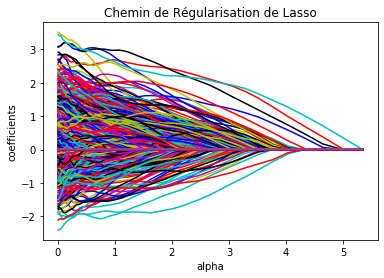

In [30]:
colors = cycle(['y','m', 'b', 'c', 'r', 'k'])
for coef_l, c in zip(coefs_lasso, colors):
    shm = plt.plot(alphas_lasso, coef_l, c=c)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Chemin de Régularisation de Lasso')

2.c) Les valeurs optimales du paramètre de régularistion pour les 3 méthodes:

La valeur optimale du paramètre de régulariastion $\lambda^{lasso}$ pour l'estimateur de Lasso

In [31]:
intrv_lambda=np.arange(11)/10
stock_err_lasso2=[]
for i in intrv_lambda:
    regrs = ElasticNet(l1_ratio=1,alpha=i)
    y_pred_lasso2 = regrs.fit(X_train, y_train).predict(X_test)
    err_squared_lasso2=mean_squared_error(y_test,y_pred_lasso2)
    stock_err_lasso2.append(err_squared_lasso2)
    
        

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Text(0, 0.5, 'MSE')

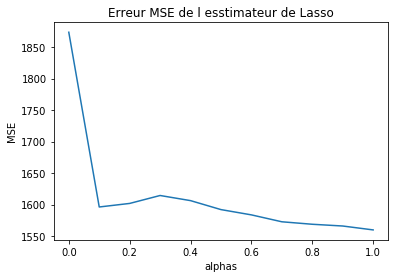

In [32]:
plt.plot(intrv_lambda,stock_err_lasso2)
plt.title('Erreur MSE de l esstimateur de Lasso')
plt.xlabel('alphas')
plt.ylabel('MSE')

In [33]:
stock_err_lasso2

[1873.6510821684626,
 1596.0614642375745,
 1601.7077592012388,
 1614.311544655814,
 1606.1600958554914,
 1591.906838844295,
 1583.5148067526238,
 1572.5541870855013,
 1568.6103286005364,
 1565.8345800774289,
 1559.6305287947125]

In [34]:
intrv_lambda[np.argmin(stock_err_lasso2)]

1.0

la valeur optimal du $\lambda^{lasso}$ sur nôtre intervalle des paramètres de régularisation est $1$

##

La valeur optimale du paramètre de régulariastion $\mu^{lasso}$ pour l'estimateur de Ridge:

In [35]:
stock_err_ridge2=[]
for i in intrv_lambda:
    regrs = ElasticNet(l1_ratio=0,alpha=i,max_iter=1000)
    y_pred_ridge2 = regrs.fit(X_train, y_train).predict(X_test)
    err_squared_ridge2=mean_squared_error(y_test,y_pred_ridge2)
    stock_err_ridge2.append(err_squared_ridge2)

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6482.5854384021795, tolerance: 101.60429354091487
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12775.71088

La valeur optimale du paramètre de régulariastion $\mu^{lasso}$ pour l'estimateur de Ridge:

Notre vecteur d'erreur MSE de Ridge est : 

In [36]:
stock_err_ridge2

[1873.6510821684626,
 1289.0939329889288,
 1289.8408829440198,
 1290.6462807185276,
 1291.5025548751134,
 1292.403006301293,
 1293.3417407001014,
 1294.3135601381325,
 1295.313871232906,
 1296.3386071038617,
 1297.3841607633442]

On trace ensuite l'erreur MSE pour l'estimateur de Ridge

Text(0, 0.5, 'MSE')

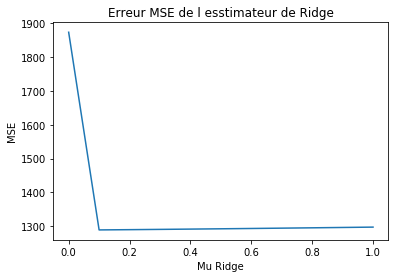

In [37]:
plt.plot(intrv_lambda,stock_err_ridge2)
plt.title('Erreur MSE de l esstimateur de Ridge')
plt.xlabel('Mu Ridge')
plt.ylabel('MSE')

In [38]:
stock_err_ridge2

[1873.6510821684626,
 1289.0939329889288,
 1289.8408829440198,
 1290.6462807185276,
 1291.5025548751134,
 1292.403006301293,
 1293.3417407001014,
 1294.3135601381325,
 1295.313871232906,
 1296.3386071038617,
 1297.3841607633442]

In [39]:
lm2=intrv_lambda[np.argmin(stock_err_ridge2)]

In [40]:
print('La valeur optimale du paramètre de régulariastion mu_ridge pour l estimateur de Ridge est',lm2) 

La valeur optimale du paramètre de régulariastion mu_ridge pour l estimateur de Ridge est 0.1


In [41]:
intrv_lambda

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Les valeurs optimales pour l'estimaeur Elastic Net:

Pour l'estimateur ElasticNet On va rechercher les 2 valeurs optimales des paramètres de régularisation sur une grille de dimension deux(une matrice) 

In [42]:
stock_err_enet2=np.zeros((len(intrv_lambda),len(intrv_lambda)))
for i in range(len(intrv_lambda)):
    for j in range(len(intrv_lambda)):
        
        regrs= ElasticNet(alpha=intrv_lambda[i],l1_ratio=intrv_lambda[j])
        y_pred_enet2 = regrs.fit(X_train, y_train).predict(X_test)
        err_squared_enet2= mean_squared_error(y_test,y_pred_enet2)
        stock_err_enet2[i,j]=err_squared_enet2

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this 

Cette ligne de commande nous affiche les coordonées de la valeur minimale de la matrice stock_err_enet qui contient l'erreur MSE pour chaque couple de points $(\lambda_{i},\alpha_{i})$

In [43]:
coord_min2=np.unravel_index(stock_err_enet2.argmin(), stock_err_enet2.shape)

In [44]:
min_enet2=intrv_lambda[coord_min2[0]], intrv_lambda[coord_min2[1]]

In [45]:
intrv_lambda[coord_min2[0]], intrv_lambda[coord_min2[1]]

(0.1, 0.2)

On déduit de ce qui précède que les valeurs optimales  pour l'estimaeur ElasticNet sont :

In [46]:
print('lambda=',min_enet2[0],'alpha=',min_enet2[1])

lambda= 0.1 alpha= 0.2


$2.d)$ le meilleur estimateur qui fournit la meilleur prédiction est celui qui a le MSE le plus faible en fonction des paramètres de régularisation optimales. Faisons donc une comparaison des MSE de nos trois estimateurs par rapport a leurs paramètres de régularisation optimales: 

In [47]:
min_lasso2=min(stock_err_lasso2)

In [48]:
print('La valeur minimale du MSE pour l estimateur de Lasso est :',min_lasso2)

La valeur minimale du MSE pour l estimateur de Lasso est : 1559.6305287947125


In [49]:
min_ridge2=min(stock_err_ridge2)

In [50]:
print('La valeur minimale du MSE pour l estimateur de Ridge est :',min_ridge2)

La valeur minimale du MSE pour l estimateur de Ridge est : 1289.0939329889288


In [51]:
min_enet2=stock_err_enet2[coord_min2[0],coord_min2[1]]

In [52]:
print('La valeur minimale du MSE pour l estimateur de ElasticNet est:',min_enet2)

La valeur minimale du MSE pour l estimateur de ElasticNet est: 1282.934615798063


Donc le meilleur estimateur qui réalise la meilleure prédiction sur l'echantillon test et qui a le MSE le plus faible est donc l'estimateur de Ridge, qui est égale aussi à l'estimateur de ElasticNet 

                                             Question 3

On pose maintenant, $n=100, p=50, \beta_{1}=\beta_{2}=10, \beta_{3}=\beta_{4}=5, \beta_{5}=...=\beta_{14}=1,$ et les autres coordonnées sont nulles. On suppose aussi que les prédicteurs sont corrélés : $cov(X_{k,i},X_{k,j})=0.7^{|i-j|}$

In [53]:
n=100
p=50
eta=np.random.randn(n)
beta=np.zeros(p)
beta[:2]=10
beta[2:4]=5
beta[4:15]=1
mean = np.zeros(p)
cov=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        cov[i,j]=0.7**(abs(i-j))
X=np.random.multivariate_normal(mean,cov,100)
y=np.dot(X,beta)+eta

On sépare ensuite notre échantillon en deux: deux tiers de données pour l'estimation du modèle et un tiers des données pour tester le modèle retenu:

In [54]:
X_train, y_train = X[:(2*(n))//3], y[:(2*(n))//3]
X_test, y_test = X[(2*(n))//3:], y[(2*(n))// 3:]

3.a) Estimation du vecteur de regression par la méthode Elastic-Net pour toutes les valeur de $\alpha$ dans {0,0.1,0.2,...,0.9,1}

In [55]:
k=np.arange(10)/10
for i in k:
    regr = ElasticNet(l1_ratio=i)
    regr.fit(X, y)
    print("pour lambda =",i,"betachapeau =",regr.coef_)

pour lambda = 0.0 betachapeau = [ 4.98453939  5.87409715  4.63580672  3.74854085  1.8159991   1.2029438
  1.02331164  1.63598628  0.5762442   0.47142098 -0.13960051  0.62440586
  0.53568258  0.52018297  0.67297558 -0.10615647  0.3404381   0.26554661
  0.06884374  0.50997552  0.8174532  -0.24163916 -0.28190046  0.07624099
 -0.3825919   0.03725528 -0.35429331 -0.33072413  0.0211057  -0.4478213
 -0.02026869  0.22382647 -0.06483531 -0.36745822  0.29759112 -0.01017725
 -0.04644687  0.18547237 -0.3271693   0.16267615 -0.13223567 -0.14157651
 -0.04028018  0.3322455  -0.65260038 -0.25561968 -0.069913   -0.62282375
 -0.4512136  -0.13490859]
pour lambda = 0.1 betachapeau = [ 5.18203202  6.09735538  4.74834675  3.82115307  1.8063368   1.17214564
  0.99672006  1.64356777  0.56869853  0.44323702 -0.          0.60591243
  0.50337477  0.50471145  0.65575756 -0.          0.29070387  0.21565255
  0.00981339  0.45338057  0.77111457 -0.15052783 -0.21347006  0.
 -0.33117011  0.         -0.30590365 -0.2832

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7969.830483674948, tolerance: 6.359355189362138
  positive)


3.b) Chemin de régularisation de Lasso

Le chemin de régularisation de la régression Lasso est l’ensemble des
fonctions: $$\lambda \longmapsto (\hat{\beta}^{lasso})_j$$ pour $j=1,...50$

In [56]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)

Text(0.5, 1.0, 'Chemin de Régularisation de Lasso')

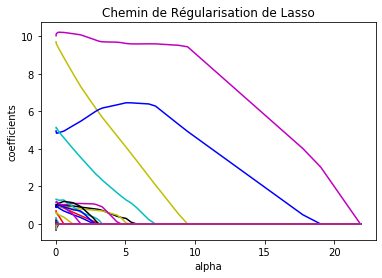

In [57]:
colors = cycle(['y','m', 'b', 'c', 'r', 'k'])
for coef_l, c in zip(coefs_lasso, colors):
    shm = plt.plot(alphas_lasso, coef_l, c=c)
plt.xlabel('alpha')
plt.ylabel('coefficients')
#plt.legend(shm)
plt.title('Chemin de Régularisation de Lasso')
#plt.axis('tight')

3.c) Les valeurs optimales du paramètre de régularistion pour les 3 méthodes:

La valeur optimale du paramètre de régulariastion $\lambda$ pour l'estimateur de Lasso

In [58]:
intrv_lambda=np.arange(11)/10
stock_err_lasso3=[]
for i in intrv_lambda:
    regrs = ElasticNet(l1_ratio=1,alpha=i)
    #regrs.fit(X_train, y_train)
    y_pred_lasso3 = regrs.fit(X_train, y_train).predict(X_test)
    err_squared_lasso3=mean_squared_error(y_test,y_pred_lasso3)
    #err_squared=mean_squared_error(np.dot(X_test,regrs.coef_),regrs.predict(X_test))
    #err_squared=mean_squared_error(regrs.coef_,beta)
    stock_err_lasso3.append(err_squared_lasso3)
    
        

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.487801447945907, tolerance: 5.186111843474379
  positive)


Text(0, 0.5, 'MSE')

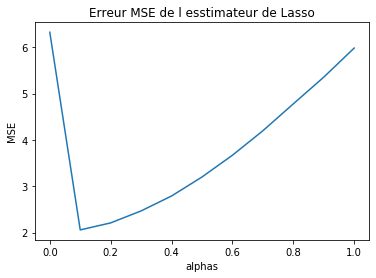

In [59]:
plt.plot(intrv_lambda,stock_err_lasso3)
plt.title('Erreur MSE de l esstimateur de Lasso')
plt.xlabel('alphas')
plt.ylabel('MSE')

In [60]:
intrv_lambda[np.argmin(stock_err_lasso3)]

0.1

la valeur optimal du $\lambda^{lasso}$ sur nôtre intervalle des paramètres de régularisation est $0.1$

##

La valeur optimale du paramètre de régulariastion $\mu^{lasso}$ pour l'estimateur de Ridge:

In [61]:
stock_err_ridge3=[]
for i in intrv_lambda:
    regrs = ElasticNet(l1_ratio=0,alpha=i,max_iter=1000)
    regrs.fit(X_train, y_train)
    y_pred_ridge3 = regrs.fit(X_train, y_train).predict(X_test)
    err_squared_ridge3=mean_squared_error(y_test,y_pred_ridge3)
    #err_squared=mean_squared_error(np.dot(X_test,regrs.coef_),regrs.predict(X_test))
    #err_squared=mean_squared_error(np.dot(X_train,regrs.coef_),y_train)
    #err_squared=mean_squared_error(regrs.coef_,beta)
    stock_err_ridge3.append(err_squared_ridge3)

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.487801447945907, tolerance: 5.186111843474379
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/hajjimohammed/opt

La valeur optimale du paramètre de régulariastion $\mu^{lasso}$ pour l'estimateur de Ridge:

Notre vecteur d'erreur MSE de Ridge est : 

In [62]:
stock_err_ridge3

[6.323350633948131,
 3.6743224019812835,
 5.852971426313514,
 8.987267883756306,
 12.637161764067374,
 16.571864907078776,
 20.652577598311268,
 24.790968139262418,
 28.92925873927526,
 33.029249409579634,
 37.06574706827495]

On trace ensuite l'erreur MSE pour l'estimateur de Ridge

Text(0, 0.5, 'MSE')

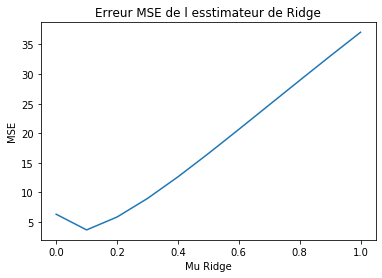

In [63]:
plt.plot(intrv_lambda,stock_err_ridge3)
plt.title('Erreur MSE de l esstimateur de Ridge')
plt.xlabel('Mu Ridge')
plt.ylabel('MSE')

In [64]:
lm3=intrv_lambda[np.argmin(stock_err_ridge3)]

In [65]:
print('La valeur optimale du paramètre de régulariastion mu_ridge pour l estimateur de Ridge est',lm3) 

La valeur optimale du paramètre de régulariastion mu_ridge pour l estimateur de Ridge est 0.1


Les valeurs optimales pour l'estimaeur Elastic Net:

Pour l'estimateur ElasticNet On va rechercher les 2 valeurs optimales des paramètres de régularisation sur une grille de dimension deux(une matrice). 

In [66]:
stock_err_enet3=np.zeros((len(intrv_lambda),len(intrv_lambda)))
for i in range(len(intrv_lambda)):
    for j in range(len(intrv_lambda)):
        
        regrs= ElasticNet(alpha=intrv_lambda[i],l1_ratio=intrv_lambda[j])
        regrs.fit(X_train, y_train)
        y_pred_enet3 = regrs.fit(X_train, y_train).predict(X_test)
        err_squared_enet3= mean_squared_error(y_test,y_pred_enet3)
        stock_err_enet3[i,j]=err_squared_enet3

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.487801447945907, tolerance: 5.186111843474379
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-

/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1498.2539561593492, tolerance: 5.186111843474379
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2132.990996904374, tolerance: 5.186111843474379
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2132.990996904374, tolerance: 5.186111843474379
  positive)
/Users/hajjimohammed/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did

Cette ligne de commande nous affiche les coordonées de la valeur minimale de la matrice stock_err_enet qui contient l'erreur MSE pour chaque couple de points $(\lambda_{i},\alpha_{i})$

In [67]:
coord_min3=np.unravel_index(stock_err_enet3.argmin(), stock_err_enet3.shape)

In [68]:
min_enet3=intrv_lambda[coord_min3[0]], intrv_lambda[coord_min3[1]]

In [69]:
intrv_lambda[coord_min3[0]], intrv_lambda[coord_min3[1]]

(0.1, 1.0)

On déduit de ce qui précède que les valeurs optimales  pour l'estimaeur ElasticNet sont :

In [70]:
print('lambda=',min_enet3[0],'alpha=',min_enet3[1])

lambda= 0.1 alpha= 1.0


$3.d)$ le meilleur estimateur qui fournit la meilleur prédiction est celui qui a le MSE le plus faible en fonction des paramètres de régularisation optimales. Faisons donc une comparaison des MSE de nos trois estimateurs par rapport a leurs paramètres de régularisation optimales: 

In [71]:
min_lasso3=min(stock_err_lasso3)

In [72]:
print('La valeur minimale du MSE pour l estimateur de Lasso est :',min_lasso3)

La valeur minimale du MSE pour l estimateur de Lasso est : 2.0586632252659722


In [73]:
min_ridge3=min(stock_err_ridge3)

In [74]:
print('La valeur minimale du MSE pour l estimateur de Ridge est :',min_ridge3)

La valeur minimale du MSE pour l estimateur de Ridge est : 3.6743224019812835


In [75]:
min_enet3=stock_err_enet3[coord_min3[0],coord_min3[1]]

In [76]:
print('La valeur minimale du MSE pour l estimateur de ElasticNet est:',min_enet3)

La valeur minimale du MSE pour l estimateur de ElasticNet est: 2.0586632252659722


Donc le meilleur estimateur qui réalise la meilleure prédiction sur l'echantillon test et qui a le MSE le plus faible est donc l'estimateur de ElasticNet 

   ### Exercice 2

Le but de cette partie est de choisir parmi deux modèles de régression linéaire régularisés $Ridge$ et $Lasso$ du module $sklearn.linear\_model $ qui choisit les meilleures variables explicatives.
Pour cela, on va appliquer ces deux méthodes sur un jeu de données $train.csv $ et $test.csv$ Avec 79 variables explicatives (de base, mais on va rajouter d'autres) décrivant (presque) tous les aspects des maisons d'habitation à Ames, dans l'Iowa, afin de prévoir le prix final de chaque maison.

In [24]:
train = pd.read_csv("/Users/hajjimohammed/Desktop/train.csv")
test = pd.read_csv("/Users/hajjimohammed/Desktop/test.csv")

In [25]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


On va concaténer nôtre jeu de données:

In [26]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

Ici nous allons :

 -Créer des variables factices pour les fonctionnalités catégorielles

-Remplacer les valeurs manquantes numériques (NaN) par la moyenne de leurs colonnes respectives

-Prendre le logarithme de la target 

In [27]:
#logarthme de la target:
train["SalePrice"] = np.log1p(train["SalePrice"])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [28]:
all_data = pd.get_dummies(all_data)

In [29]:
#remplissons NA avec la moyenne de la colonne
all_data = all_data.fillna(all_data.mean())


In [31]:
np.shape(all_data)

(2919, 288)

On dispose maintenant de $288$ variables explicatives (colonnes)

Création des matrice $X\_train$ et $X\_test$ pour $sklearn$:

In [32]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice

On compare maintenant nos deux modèle. Mais créons d'abord  une fonction qui renvoie l'erreur de la validation croisée, vu qu'on dispose pas de $y\_test$ pour le moment afin que nous puissions évaluer nos modèles et choisir le meilleur: 

In [33]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [34]:
model_ridge = Ridge()

Le paramètre de régularisation $\mu$ du modèle Ridge mesure la souplesse de notre modèle. Plus la régularisation est élevée, moins notre modèle sera enclin à sur-adapter. Cependant, il perdra également de la flexibilité et pourrait ne pas capturer tout le signal dans les données.

In [35]:
mus = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in mus]

On Trace l'erreur  MSE pour le modèle de Ridge : 

Text(0,0.5,'rmse')

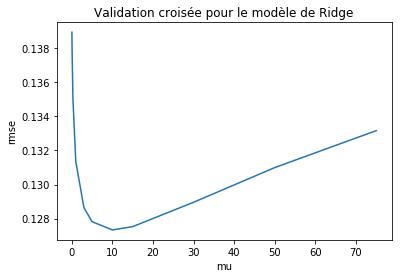

In [36]:
cv_ridge = pd.Series(cv_ridge, index = mus)
cv_ridge.plot(title = "Validation croisée pour le modèle de Ridge")
plt.xlabel("mu")
plt.ylabel("rmse")

La courbe en forme de U ci-dessus. Lorsque $\mu$ est trop grand, la régularisation est trop forte et le modèle ne peut pas saisir toutes les complexités des données. Si toutefois nous laissons le modèle trop flexible ($\mu$ petit), le modèle commence à sur-adapter. Une valeur de alpha = 10 correspond à peu près à la base du graphique ci-dessus.

In [37]:
cv_ridge.min()

0.12733734668670768

Donc, pour la régression Ridge, nous obtenons un $rmse$ d'environ $0,127$

Essayons le modèle de Lasso. Nous allons faire une approche légèrement différente ici et utiliser le CV intégré dans Lasso pour déterminer le meilleur $\lambda^{lasso}$ pour nous.

In [38]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [39]:
rmse_cv(model_lasso).mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/

0.12314421090977459

 Le lasso fonctionne mieux, nous pourrons donc utiliser celui-ci pour prédire le test. Un autre aspect intéressant du Lasso est qu’il sélectionne les fonctionnalités pour nous - en réglant les coefficients des entités qu’il juge sans importance à zéro.

Regardons les coefficients qui a gardé et les coefficients qui a éliminé:

In [40]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)


In [41]:
print("Lasso  a gardé " + str(sum(coef != 0)) + " variables et il a  eliminé " +  str(sum(coef == 0)) + " variables")

Lasso  a gardé 111 variables et il a  eliminé 177 variables


Il convient toutefois de noter ici que les variables sélectionnées ne sont pas nécessairement les "correctes", d’autant plus que cet ensemble de données contient de nombreuses variables colinéaires. Une idée à essayer ici est d'exécuter Lasso à quelques reprises sur des échantillons boostés et de voir à quel point la sélection de fonctions est stable.